In [1]:
# import standard libraries
import glob
import re
# import third-party libraries
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import GridSearchCV
# import local libraries
from mlf import LogisticRegressor

In [2]:
NUM_TOPICS = glob.glob(r'data/nlp/*.gensim')
NUM_TOPICS = [int(re.findall(r'\d+', s)[0]) for s in NUM_TOPICS]
NUM_DAYS = [2, 3, 5, 7, 14, 21, 28, 35, 42, 49, 56]

# Some tests

In [3]:
reg = LogisticRegressor()
_, _ = reg.generate_xy(num_topics=100, num_days=30)
_ = reg.scale_x()

/home/williammartin/miniconda3/envs/epfl/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/williammartin/Github/mlf-project/mlf/mlf_utils.py:118: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['num_app_prior'] = np.nan


In [4]:
reg.X

,cited_patent_number,num_inventor,patent_num_claims,num_app_prior,rd_exp,topic0,topic1,topic2,topic3,topic4,...,topic90,topic91,topic92,topic93,topic94,topic95,topic96,topic97,topic98,topic99
8624,8.0,4.0,7.0,1.0,0.645314,0.000175,0.000175,0.000175,0.018289,0.073889,...,0.000175,0.000175,0.076860,0.000175,0.000175,0.038320,0.000175,0.000175,0.000175,0.000175
1472,37.0,5.0,3.0,0.0,0.309242,0.000250,0.067045,0.036304,0.000250,0.000250,...,0.000250,0.000250,0.000250,0.000250,0.000250,0.000250,0.000250,0.000250,0.000250,0.000250
3903,1.0,7.0,5.0,0.0,0.215166,0.274955,0.000667,0.133980,0.000667,0.000667,...,0.000667,0.000667,0.000667,0.000667,0.000667,0.000667,0.000667,0.000667,0.000667,0.117122
3924,103.0,4.0,54.0,0.0,0.215166,0.000238,0.000238,0.000238,0.000238,0.000238,...,0.000238,0.000238,0.000238,0.000238,0.000238,0.000238,0.058978,0.000238,0.000238,0.000238
5146,1.0,9.0,6.0,0.0,0.296892,0.000500,0.000500,0.000500,0.000500,0.000500,...,0.000500,0.000500,0.000500,0.000500,0.000500,0.000500,0.000500,0.000500,0.000500,0.000500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8309,4.0,5.0,19.0,1.0,0.444778,0.000625,0.000625,0.000625,0.000625,0.000625,...,0.000625,0.000625,0.000625,0.063122,0.000625,0.000625,0.000625,0.000625,0.000625,0.000625
8003,1.0,5.0,1.0,1.0,0.224169,0.000303,0.122921,0.000303,0.000303,0.000303,...,0.000303,0.000303,0.000303,0.000303,0.000303,0.000303,0.000303,0.000303,0.000303,0.000303
7467,1.0,6.0,10.0,0.0,0.172408,0.001250,0.001250,0.001250,0.001250,0.001250,...,0.001250,0.001250,0.001250,0.001250,0.001250,0.001250,0.001250,0.001250,0.001250,0.001250
5060,61.0,5.0,18.0,0.0,0.335636,0.000417,0.000417,0.042078,0.000417,0.000417,...,0.000417,0.000417,0.000417,0.000417,0.000417,0.000417,0.000417,0.000417,0.000417,0.000417


In [5]:
pca = PCA(n_components=0.6, svd_solver='full')
pca = pca.fit(reg.X_scaled)
X = pca.transform(reg.X_scaled)
print(len(pca.explained_variance_ratio_))
pca.explained_variance_ratio_.cumsum()

53


array([0.02455631, 0.04439104, 0.06128949, 0.07680001, 0.09210647,
       0.10576091, 0.11931092, 0.13266167, 0.14557779, 0.15804928,
       0.17022713, 0.1822857 , 0.19426273, 0.20598501, 0.21761063,
       0.22903775, 0.24044005, 0.2517772 , 0.26302607, 0.27418273,
       0.28523374, 0.29620327, 0.30713531, 0.317851  , 0.32850574,
       0.33913029, 0.3496999 , 0.36020184, 0.37062373, 0.38100058,
       0.39136778, 0.40163923, 0.41188105, 0.42196319, 0.43203951,
       0.44204809, 0.45198274, 0.46187129, 0.47175076, 0.4815918 ,
       0.4913649 , 0.50108968, 0.51078288, 0.52034612, 0.52989584,
       0.53944083, 0.54893283, 0.55841294, 0.56785098, 0.57726244,
       0.58657855, 0.59586024, 0.60509182])

sk = SelectKBest(score_func=fp_regression, k=10)
sk = sk.fit(reg.X_scaled, reg.y['y_bin'])
X = sk.transform(reg.X_scaled)

In [6]:
param_grid = {'C': [0.1, 1, 10, 100]} 

# separate train and test
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    reg.y['y_bin'],
                                                    test_size=0.3,
                                                    random_state=0,
                                                    stratify=reg.y['y_bin'])

cv = GridSearchCV(reg, param_grid)
cv = cv.fit(X_train, y_train)
print(cv.score(X_train, y_train))
print(cv.score(X_test, y_test))

0.562123217173945
0.5507544581618655


In [7]:
c_opt = cv.best_estimator_.C
print(c_opt)

10


# Iterate over hyperparameters

In [8]:
param_grid = {'C': [0.1, 1, 10, 100]} 

In [9]:
all_models = []
for t in NUM_TOPICS:
    for d in NUM_DAYS:
        # create model
        reg = LogisticRegressor()
        _, _ = reg.generate_xy(num_topics=t, num_days=d, keep_app=False, delay=60)
        _ = reg.scale_x()
        
        # perform PCA
        pca = PCA(n_components=0.6, svd_solver='full')
        pca = pca.fit(reg.X_scaled)
        X = pca.transform(reg.X_scaled)
        reg.num_feat = X.shape[1] # keep track of number of features kept

        # separate train and test
        X_train, X_test, y_train, y_test = train_test_split(X, 
                                                            reg.y['y_bin'],
                                                            test_size=0.3,
                                                            random_state=0,
                                                            stratify=reg.y['y_bin'])
        
        # train best model
        #reg = reg.fit(X_train, y_train)
        cv = GridSearchCV(reg, param_grid)
        cv = cv.fit(X_train, y_train)
        
        reg.train_acc = cv.score(X_train, y_train)
        reg.test_acc = cv.score(X_test, y_test)
        
        all_models.append(reg)

/home/williammartin/miniconda3/envs/epfl/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/williammartin/Github/mlf-project/mlf/mlf_utils.py:118: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['num_app_prior'] = np.nan
/home/williammartin/miniconda3/envs/epfl/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

/home/williammartin/miniconda3/envs/epfl/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/williammartin/Github/mlf-project/mlf/mlf_utils.py:118: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['num_app_prior'] = np.nan
/home/williammartin/miniconda3/envs/epfl/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

/home/williammartin/miniconda3/envs/epfl/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/williammartin/Github/mlf-project/mlf/mlf_utils.py:118: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['num_app_prior'] = np.nan
/home/williammartin/miniconda3/envs/epfl/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

/home/williammartin/miniconda3/envs/epfl/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/williammartin/Github/mlf-project/mlf/mlf_utils.py:118: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['num_app_prior'] = np.nan
/home/williammartin/miniconda3/envs/epfl/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

In [10]:
all_scores = pd.DataFrame(columns=['num_topics', 'num_days', 'train', 'test'])
all_scores['num_topics'] = [m.num_topics for m in all_models]
all_scores['num_days'] = [m.num_days for m in all_models]
all_scores['train'] = [m.train_acc for m in all_models]
all_scores['test'] = [m.test_acc for m in all_models]
all_scores['num_feat'] = [m.num_feat for m in all_models]

In [11]:
all_scores

,num_topics,num_days,train,test,num_feat
0,200,2,0.537673,0.507641,101
1,200,3,0.545934,0.502990,101
2,200,5,0.551488,0.496013,101
3,200,7,0.553910,0.512292,101
4,200,14,0.563719,0.524743,101
5,200,21,0.549687,0.519097,101
6,200,28,0.566263,0.549801,101
7,200,35,0.566387,0.543825,101
8,200,42,0.574395,0.562044,101
9,200,49,0.580512,0.545123,101


In [17]:
%matplotlib inline

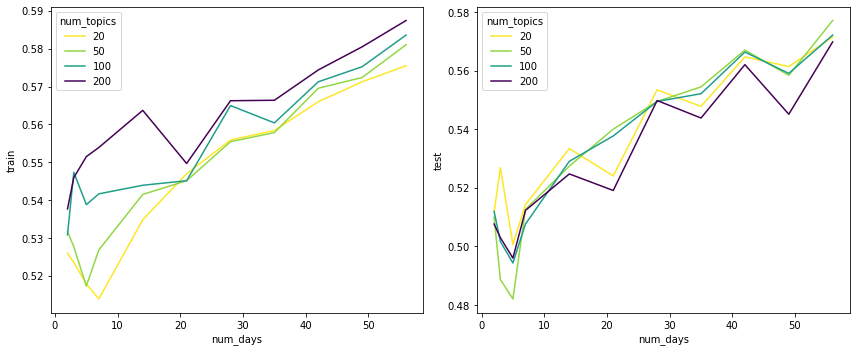

In [18]:
fig, ax = plt.subplots(figsize=(12, 5), nrows=1, ncols=2)
sns.lineplot(data=all_scores, x='num_days', y='train', hue='num_topics', ax=ax[0],
            palette='viridis_r')
sns.lineplot(data=all_scores, x='num_days', y='test', hue='num_topics', ax=ax[1],
            palette='viridis_r')
#sns.scatterplot(data=all_scores, x='num_days', y='num_topics', hue='train', size='train', ax=ax[0])
#sns.scatterplot(data=all_scores, x='num_days', y='num_topics', hue='test', size='test', ax=ax[1], 
#                palette='viridis_r')
plt.tight_layout()

In [14]:
%matplotlib notebook

<IPython.core.display.Javascript object>


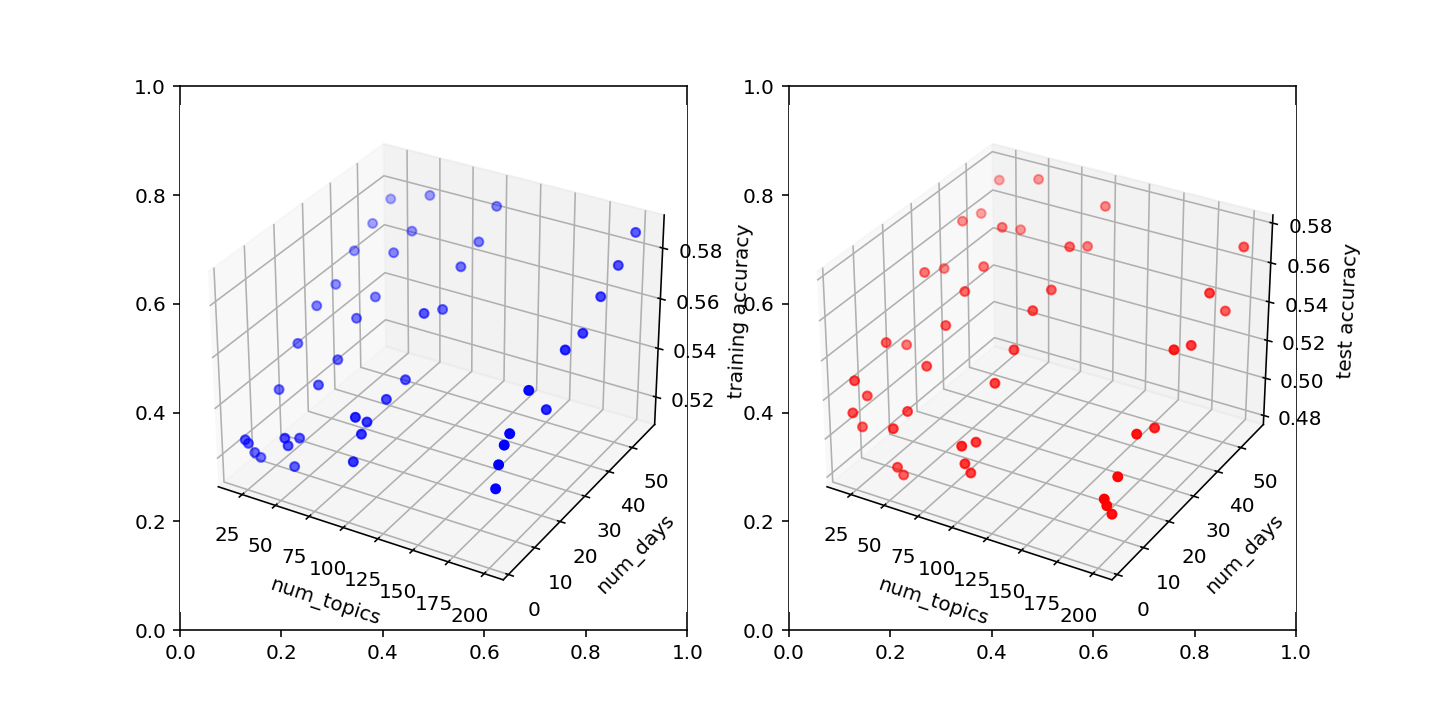

Text(0.5, 0, 'test accuracy')

In [15]:
fig, ax = plt.subplots(figsize=[10, 5], nrows=1, ncols=2)

ax = fig.add_subplot(121, projection='3d')
ax.scatter(all_scores['num_topics'], all_scores['num_days'], all_scores['train'], c='blue')
ax.set_xlabel("num_topics")
ax.set_ylabel("num_days")
ax.set_zlabel("training accuracy")

ax = fig.add_subplot(122, projection='3d')
ax.scatter(all_scores['num_topics'], all_scores['num_days'], all_scores['test'], c='red')
ax.set_xlabel("num_topics")
ax.set_ylabel("num_days")
ax.set_zlabel("test accuracy")